#  02_clustering_analysis.ipynb


## 1. Overview

This project explores document clustering using a subset of the 20 Newsgroups dataset. The documents are represented in a sparse term-document matrix, and clustering is performed using KMeans with a custom cosine similarity distance function.

Key components of this project include:
- Loading and preprocessing textual data
- Implementing a self-written cosine distance function
- Performing KMeans clustering with custom distance measurement
- Extracting top-N frequent terms from each cluster
- Visualizing clusters through WordCloud representations
- Evaluating clustering performance using Homogeneity and Completeness scores
- Classifying a holdout test set based on cluster centroids

Through this project, both algorithmic understanding and practical application of clustering techniques are demonstrated, particularly highlighting the challenges of clustering high-dimensional textual data.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import src.kMeans1 as kMeans1
from wordcloud import WordCloud
from sklearn.metrics import completeness_score, homogeneity_score

## 2. Data Loading

In [3]:
matrix = pd.read_csv('../data/matrix.txt', delimiter = ",", header=None)
classes = pd.read_csv('../data/classes.txt',skiprows=1, header=None, index_col = 0, delim_whitespace=True)
terms = pd.read_csv('../data/terms.txt', delimiter = ",", header=None)

In [4]:
matr = matrix.T
matr

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split dataset into 8:2

In [5]:
X_train, X_test, y_train, y_test = train_test_split(matr, classes, test_size=0.2, random_state=33)

## 3. Self-Written Cosine Distance Function

In [6]:
def distCosine(vecA,vecB):
    normA = np.linalg.norm(vecA)
    normB = np.linalg.norm(vecB)
    sims = np.dot(vecA,vecB)/(normA * normB)
    dists = 1 - sims
    return dists

## 4. KMeans Clustering with Custom Cosine Distance

### Clusing using Kmean

In [7]:
X_n = np.array(X_train)

In [8]:
centroids, clusters = kMeans1.kMeans(X_n, 5, distCosine, kMeans1.randCent)

### Counts for different clusters

In [9]:
pd.DataFrame(clusters[:,0]).value_counts()

0  
0.0    1632
1.0     350
2.0       6
3.0       6
4.0       6
Name: count, dtype: int64

### Merga class label at the end of training set and transfer to data frame

In [10]:
cls = clusters[:,0].reshape(2000,1)
new = np.append(X_n,cls,axis = 1)
new = pd.DataFrame(new)

### Group each class together and drop the label
### Replace 0 with NA for easier processing 

In [11]:
ca0 =  new[new[9328]==0].drop(9328,axis=1).replace(0,np.nan)
ca1 =  new[new[9328]==1].drop(9328,axis=1).replace(0,np.nan)
ca2 =  new[new[9328]==2].drop(9328,axis=1).replace(0,np.nan)
ca3 =  new[new[9328]==3].drop(9328,axis=1).replace(0,np.nan)
ca4 =  new[new[9328]==4].drop(9328,axis=1).replace(0,np.nan)

## 6. Top-N Term Extraction per Cluster

### Define a function to find the top 10 DF word and print it out

In [12]:
def display(classes, terms, name):
    '''
    This Function will allow you to find the top 10 DF word and print it out
    '''
    # find DF for each term in this class 
    DF = pd.DataFrame(classes.count()) 
    perc = DF / len(classes) 
    # find freq 
    freq = pd.DataFrame(classes.sum())/DF
    # get top ten terms as a list 
    Fst = DF.sort_values(by=0,axis=0,ascending=False).head(10).index.tolist()

    print('CLUSTER: {}  results'.format(name))
    print('Number of documents in cluster: {}'.format(len(classes)))
    print(f"{'Word' : <20}{'Frequency' : <20}{'DF' : <20}{'Percent Of Docs' : <20}") 
    for index in Fst:
            wordValue = str(np.array(terms).tolist()[index]).replace('[','').replace(']','').replace("'","")
            DFvalue = DF.loc[index,0]
            DFPercentageValue = round(perc.loc[index,0]*100,2)
            freqValue = round(freq.loc[index,0],2)
            print(f"{wordValue : <20}{freqValue : <20}{DFvalue : <20}{DFPercentageValue : <20}")   
    
    print("-------------------------------------------------------------------------------")  

### Print final results for each class

In [13]:
classes = [ca0,ca1,ca2,ca3,ca4]
name = 0
for cla in classes:
    display(cla,terms,name)
    name += 1

CLUSTER: 0  results
Number of documents in cluster: 1632
Word                Frequency           DF                  Percent Of Docs     
subject             1.08                1632                100.0               
write               1.33                727                 44.55               
on                  2.0                 615                 37.68               
articl              1.28                545                 33.39               
know                1.64                481                 29.47               
get                 1.71                458                 28.06               
just                1.5                 436                 26.72               
think               1.7                 413                 25.31               
time                1.61                389                 23.84               
go                  1.74                367                 22.49               
----------------------------------------------------

### Generate Word Clouds for each cluster based on DF values

#### WordCloud Visualization Function: `wordcld(cl, terms)`

This function generates a WordCloud visualization based on term frequencies within a given cluster.

**Inputs:**
- `cl`: A matrix or array where rows represent documents and columns represent term occurrences within a specific cluster. Typically, this is a subset of the document-term matrix for a single cluster.
- `terms`: A list or array of term names corresponding to the columns of the cluster matrix.

**Functionality:**
- Calculates the total frequency of each term across all documents in the cluster.
- Constructs a dictionary mapping terms to their frequencies.
- Uses the `WordCloud` library to create a visual representation, highlighting the most frequent terms.

**Output:**
- Displays a WordCloud image where word size reflects term frequency within the cluster.

This visualization helps intuitively understand the dominant topics or keywords characterizing each cluster.

In [14]:
def wordcld (cl,terms):
    # Check if cl is empty or all-zero
    if cl.sum().sum() == 0:
        print("Warning: No terms to display in WordCloud (empty or zero-frequency cluster).")
        return

    freq = pd.DataFrame(cl.sum())

    wcl = pd.concat([terms,freq],axis=1)

    wcl.columns = ['w','v']

    dict1 = dict(zip(wcl['w'],wcl['v']))
    font_path = "../src/DejaVuSerif.ttf"
    wc = WordCloud(font_path=font_path, 
                   background_color="white",
                   width=1200, 
                   height=800, 
                   margin=2,
                   max_words=200).generate_from_frequencies(dict1)
    #plt.imshow(wc)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Display Word Cloud for all 5 Classes

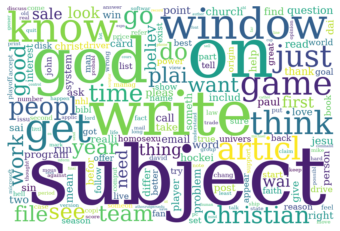

In [15]:
wordcld(ca0,terms)

**Word Cloud for Cluster 0**

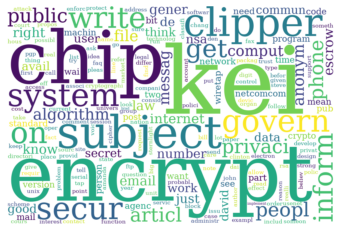

In [16]:
wordcld(ca1,terms)

**Word Cloud for Cluster 1**

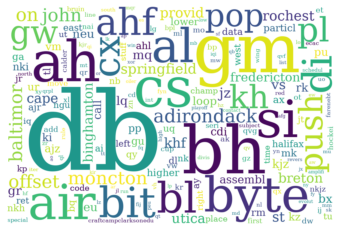

In [17]:
wordcld(ca2,terms)

**Word Cloud for Cluster 2**

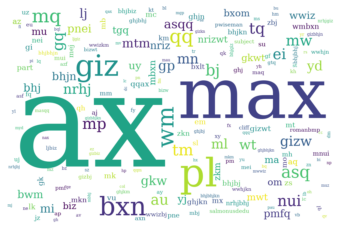

In [18]:
wordcld(ca3,terms)

**Word Cloud for Cluster 3**

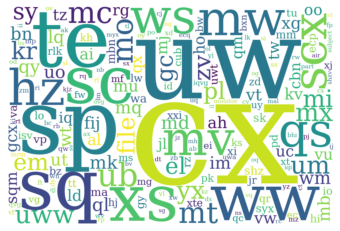

In [19]:
wordcld(ca4,terms)

**Word Cloud for Cluster 4**

## 7. Clustering Evaluation

### Computing the Completeness and Homogeneity values

In [20]:
cluster = pd.DataFrame(clusters, columns=["Cluster", "MinDistance**2"])
newC = cluster["Cluster"].astype(int)
target = np.array(y_train)[:,0]

In [21]:
print(completeness_score(target,newC))

0.6430974822449699


In [22]:
print(homogeneity_score(target,newC))

0.2090956352701593


### Clustering Evaluation Summary

The clustering results show a Completeness score of 64%, indicating that documents belonging to the same true class are relatively well grouped into the same cluster. This suggests that the clustering structure captures a reasonable portion of the underlying class distribution.

However, the Homogeneity score is considerably lower at around 21%, meaning that individual clusters often contain documents from multiple different classes. This reflects that while the clustering process gathers similar documents together to some extent, the purity within each cluster is poor.

Overall, the clustering captures some global structure of the data but fails to create clean, distinct clusters corresponding to the original categories. Potential reasons for this include overlapping vocabulary between different classes, limitations of the feature representation, or the inherent difficulty of clustering textual data without supervised signals.

## 8. Classification on Holdout Test Set (20%)

### Test Set Classification Function: `classificator(X_test, centroids)`

This function assigns cluster labels to test documents based on their cosine similarity to the cluster centroids obtained during KMeans clustering.

**Inputs:**
- `X_test`: A DataFrame containing the document-term feature vectors for the holdout test set.
- `centroids`: A list or array of centroid vectors representing the clusters from training.

**Functionality:**
- Computes the cosine distance between each test document and all cluster centroids.
- Assigns each document to the cluster whose centroid is closest (smallest cosine distance).
- For each test document, records:
  - The predicted cluster label
  - The cosine similarity score (lower value indicates higher similarity)

**Output:**
- A DataFrame indexed by the test document IDs, with two columns:
  - `Class`: Predicted cluster label (0 to 4)
  - `Cosine sim`: Cosine distance to the assigned cluster centroid

This classification method enables extending unsupervised clustering to predict labels for unseen data points based on learned cluster structures.

In [23]:
def classificator(X_test,centroids):
    '''
    This function will label your test set with given classes from centroids
    X_test should be a dataframe
    It will return a dataframe with documents index with predicted classes and cosine similarity
    '''
    X_s = np.array(X_test) 
    clf = np.zeros(shape=(len(X_s),2))      
    for i in range(len(X_s)):
            d = []
            d.append(float(distCosine(X_s[i],centroids[0])))
            d.append(float(distCosine(X_s[i],centroids[1])))
            d.append(float(distCosine(X_s[i],centroids[2])))
            d.append(float(distCosine(X_s[i],centroids[3])))
            d.append(float(distCosine(X_s[i],centroids[4])))
            clf[i]=[d.index(min(d)),min(d)]
            
    a = X_test.index.values.tolist()

    clf1 = pd.DataFrame(clf)
    b = clf1.set_index([a])
    b.columns = ['Class ','Cosine sim']
                   
    return b

### Predicted class and consine similarity on testing documents

In [24]:
classificator(X_test,centroids)

,Class,Cosine sim
1590,0.0,0.791808
277,0.0,0.815097
2297,0.0,0.831411
1739,0.0,0.631315
511,0.0,0.836424
...,...,...
1637,0.0,0.684899
1092,0.0,0.809965
559,0.0,0.850142
1918,1.0,0.684657


## References

- [1] Scikit-learn: Machine Learning in Python. https://scikit-learn.org/stable/
- [2] WordCloud Documentation: https://amueller.github.io/word_cloud/
- [3] Python Pillow (PIL) Documentation: https://pillow.readthedocs.io/en/stable/
- [4] 20 Newsgroups Dataset Description: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html